<a href="https://colab.research.google.com/github/goncayilmaz/cs464-ml-hws/blob/main/CS464_HW3_Fall19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CS 464</center></h1>
<h1><center>Introduction to Machine Learning</center></h1>
<h1><center>Fall 2019</center></h1>
<h1><center>Homework 3</center></h1>
<h1><center>Author: Gonca Yilmaz</center></h1>

<h3><center>Due: Jan 3, 2020 23:55 (GMT+3)</center></h3>

## Environment Setup

You may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries install attached "requirements.txt" and run following command in activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


## Question 1 [10 pts]

A computational graph is a directed graph where nodes correspond to variables or operations. 

Consider a neural network architecture consisting of a hidden layer of a single unit with sigmoid activation, 2 input neurons and 1 output neuron that calculates MSE loss. Draw the computational graph of the given architecture assuming there is no bias term at any layer. You may use any drawing tool you prefer.

Now, assume that initial weights are $w_h = 1.5$ for the hidden neuron and $w_o=-0.5$ for the output neuron. Perform the forward pass for the input instance whose features are $x_0=2$ and $x_1=-1$ and label is $y=-0.3$. Then, perform backpropagation to find gradient vector of weights $w_h$ and $w_o$. Indicate all steps of backpropagation on your computational graph.

You can check [this](https://cdn-images-1.medium.com/freeze/max/1000/1*GEpvvmhoj0yRTi_kpDS6Eg.png?q=20) link to see an example of computational graph.

NOTE: For this question, you can provide your answer in this notebook file using the next text cell or as an additional report in the PDF format.


```
# Write the url of your image to the blank in "src" parameter below
# and uncomment that section. You may use any image hosting environment
# such as imgbb, imaggmi or Google drive with appropriate link sharing. 

<img src="https://drive.google.com/file/d/1w3K4WIUdS-BYk8ymt-Y376xbA_1TbLqD/view?usp=sharing" width="300"/>
```



<img src="https://drive.google.com/file/d/1w3K4WIUdS-BYk8ymt-Y376xbA_1TbLqD/view?usp=sharing" width="300"/> computational graph

## Question 2 [90 pts]

In this question, you will perform multi-class classification on animals data set (Alessio, 2018). Specifically, you will implement a neural network with two hidden layers to distinguish 10 different animals from each other. The dataset has been preprocessed in such a way that each class has 200 samples and each sample is an image of size 100x100x3.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1rc6WbpzbLaYahK4AloPmbsEH2u_OsrKC/view
<br>


In [ ]:
from PIL import Image
#from numpy import asarray
from torchvision import transforms, datasets
import glob
import torch
from torch import nn
from matplotlib import pyplot as plt

In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2.1. Multi Layer Perceptron (MLP) [20 pts]

#### Data Loader [4 pts]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "AnimalDataset" class which will be able to load your dataset. 
Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, <b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of AnimalDataset, should be retrieved using the "get_dataset" function. Here, you are also supposed to flatten the image into a vector (also to grayscale) to be compatible with MLP. Note that the pixel values also needs to be normalized to [0,1] range.
<br>

Hint: The dataset is not normalized and your results will heavily depend on your input.


In [ ]:
class AnimalDataset(Dataset):  
    # TODO:
    # Define constructor for AnimalDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, xTensor, yTensor):
        self.x = xTensor
        self.y = yTensor
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return (self.x[index], self.y[index])


def get_dataset(root):
    # TODO: 
    # Normalize & flatten datasets
    data_transformer = transforms.Compose([
                                           transforms.Resize((100, 100)),
                                           #transforms.RandomHorizontalFlip(),
                                           transforms.Grayscale(),
                                           #transforms.Resize((1, 10000)),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean = (0.5, ), std = (0.5, ))
    ])

    # Read dataset files
    dataset = datasets.ImageFolder( root + "dataset/", data_transformer)

     # Construct training, validation and test sets
    dataset_len = len(dataset.samples)
    print("size of dataset " + str(dataset_len))

    print( dataset)
    print("labels: " + str(dataset.classes))
    train_dataset, val_dataset, test_dataset = random_split(dataset, [int(dataset_len * 0.7), int(dataset_len * 0.1), int(dataset_len * 0.2)])
    
    return train_dataset, val_dataset, test_dataset

In [ ]:
train_dataset, val_dataset, test_dataset = get_dataset( "/content/drive/My Drive/cs464_hw3/")

size of dataset 2000
Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/drive/My Drive/cs464_hw3/dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
labels: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [ ]:
print(train_dataset)

#### Neural Network [4 pts]

Now, implement your two hidden layer neural network. FNet class will represent your neural network. First hidden layer will contain 1000 neurons and second hidden layer will contain 500 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [ ]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, input_size, output_size): 
    # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super().__init__()
      """
      self.hiddenLayer1 = nn.Linear(input_size, 1000)
      self.hiddenLayer2 = nn.Linear(1000, 500)
      self.outputLayer = nn.Linear(500, output_size)
      self.ReLU = nn.ReLU()
      self.Softmax = nn.Softmax(dim = 1)
      """
      if( use_gpu ):
        device = torch.device("cuda:0")
      else:
        device = torch.device("cpu")
      self.model = nn.Sequential(nn.Linear(input_size, 1000),
                                 nn.ReLU(),
                                 nn.Linear(1000, 500),
                                 nn.ReLU(),
                                 nn.Linear(500, output_size),
                                 nn.Softmax(dim = 1)
          
      )
      self.model.to(device)
    
     
    def forward(self, X): 
    # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
      """
      X = self.hiddenLayer1(X)
      X = self.relu(X)
      X = self.hiddenLayer2(X)
      X = self.relu(X)
      X = self.output(X)
      X = self.softmax(X)
      """
      X = self.model.forward(X)

      return X

#### Training [7 pts]

Complete the code snippet below to train your network. You need to carefully select the appropriate loss function and tune hyper-parameters. Use SGD optimizer for this question. So far, you should have created three dataset splits for train, validation and test. You will need to load these splits at this phase. Make sure that you shuffle the samples in the training split. Save training loss and training accuracy of each iteration (each batch) and also save validation loss and accuracy at each epoch to use them in the next part for plotting. You can use matplotlib library for plotting. Your model is going to run upto the "max_epoch" parameter. Pick the best model so far as your final model. You need to save this model as a ".pth" file. 

In [ ]:
print( "Number of classes: " + str(len(train_dataset.dataset.classes)))
print( "Number of features: " + str(len(train_dataset.dataset.samples)))

Number of classes: 10
Number of features: 2000


In [ ]:
#HINT: note that your training time should not take many days.

input_size = 10000
output_size = 10

#TODO:
#Pick your hyper parameters
max_epoch = 100
train_batch = 100
valid_batch = 5
test_batch = 10

learning_rate = 0.1

use_gpu = torch.cuda.is_available()

if( use_gpu ):
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

print("Device: " + str(device))

train_dataset, val_dataset, test_dataset = get_dataset( "/content/drive/My Drive/cs464_hw3/")

valid_acc = []
valid_loss = []
train_loss_list = []
train_accu_list = []

def main(): # you are free to change parameters

    # Create train dataset loader
    train_dataLoader = DataLoader(train_dataset, batch_size = train_batch, shuffle = True)
    train_iter = iter(train_dataLoader)
    trainImages, trainLabels = train_iter.next()
    trainImages.flatten()
    # Create validation dataset loader
    valid_dataLoader = DataLoader(val_dataset, batch_size = valid_batch)
    # Create test dataset loader
    test_dataLoader = DataLoader(test_dataset, batch_size = test_batch)
    # initialize your GENet neural network
    model = FNet(input_size, output_size)
    # define your loss function
    criterionForNN = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0.0
    for epoch in range(max_epoch):
        print("****************************************************")
        loss_train, acc_train = train(epoch, model, criterionForNN, optimizer, train_dataLoader)
        train_loss_list.append(loss_train)
        train_accu_list.append(acc_train)
        lossV, acc = test(model, criterion, valid_dataLoader)
        valid_acc.append(acc)
        valid_loss.append(lossV)
        if acc > best_acc:
           best_acc = acc
           best_path = '/content/drive/My Drive/cs464_hw3/best_path_mlp/epoch[' + str(epoch) + ']_acc[' + str(acc) + '].pth'
           torch.save(model, best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()

    losses = []
    accuracies = []

    lossTrain = 0.0
    accTrain  = 0.0

    batch_size = 100

    total = len(loader.dataset)

    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration  
        """
        training part
        """
        #loading data and labels to device for using GPU
        data = data.to(device)
        labels = labels.to(device)

        #flatten images
        data = data.view(data.shape[0], -1)

        #forwarding data
        outputLabels = model.forward(data)

        #calculation of loss
        currentLoss = criterion(outputLabels, labels)
        losses.append(currentLoss)

        #calculation of new weights
        optimizer.zero_grad()
        currentLoss.backward()
        optimizer.step()

        #calculating accuracies
        curPredictions = torch.max(outputLabels, 1)[1]
        curAccuracy = torch.sum(curPredictions == labels)

        #updating accuracy
        accTrain += curAccuracy.item() 
        lossTrain += currentLoss.item()

        losses.append(lossTrain)
        accuracies.append(accTrain)

        loss_train = lossTrain / (batch_size * (batch_idx + 1) )
        acc_train = accTrain / (batch_size * (batch_idx + 1))
        print()
        print("Epoch [" + str(epoch + 1) + "][" + str(batch_idx + 1) + "/" + str(len(loader)) + "]")
        print("Loss: " + str(loss_train))
        print("Accu: " + str(acc_train ))
        print()

    return loss_train, acc_train



''' Test&Validate your network '''
def test(model, criterion, loader): # you are free to change parameters

    model.eval()

    accValid = 0.0
    lossValid = 0.0

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code

            #loading data and labels to device for using GPU
            data = data.to(device)
            labels = labels.to(device)

            #flatten images
            data = data.view(data.shape[0], -1)

            #forwarding data
            outputLabels = model.forward(data)

            #calculation of loss
            currentLoss = criterion(outputLabels, labels)

            #computation of accuracies
            curPredictions = torch.max(outputLabels, 1)[1]
            curAccuracy = torch.sum(curPredictions == labels)

            #updating accuracy
            accValid += curAccuracy.item()
            lossValid += currentLoss.item()
        
    loss_Valid = lossValid / len(loader.dataset) 
    acc_Valid = accValid / len(loader.dataset) 

    print()
    print("Validation Results:")    
    print("Loss: " + str(loss_Valid))
    print("Accu: " + str(acc_Valid))
    print()

    return loss_Valid, acc_Valid


Device: cuda:0
size of dataset 2000
Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/drive/My Drive/cs464_hw3/dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
labels: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [ ]:
main()

****************************************************

Epoch [1][1/14]
Loss: 0.023026983737945556
Accu: 0.11


Epoch [1][2/14]
Loss: 0.023025652170181276
Accu: 0.1


Epoch [1][3/14]
Loss: 0.023023866017659506
Accu: 0.11


Epoch [1][4/14]
Loss: 0.02302333414554596
Accu: 0.1


Epoch [1][5/14]
Loss: 0.023022109985351563
Accu: 0.1


Epoch [1][6/14]
Loss: 0.023023447593053182
Accu: 0.10333333333333333


Epoch [1][7/14]
Loss: 0.02302177940096174
Accu: 0.11285714285714285


Epoch [1][8/14]
Loss: 0.023021595776081084
Accu: 0.1125


Epoch [1][9/14]
Loss: 0.023019702434539796
Accu: 0.11888888888888889


Epoch [1][10/14]
Loss: 0.023019301176071167
Accu: 0.121


Epoch [1][11/14]
Loss: 0.023019790215925737
Accu: 0.11818181818181818


Epoch [1][12/14]
Loss: 0.023017539381980895
Accu: 0.1225


Epoch [1][13/14]
Loss: 0.023016624450683594
Accu: 0.12615384615384614


Epoch [1][14/14]
Loss: 0.023014776366097587
Accu: 0.12714285714285714


Validation Results:
Loss: 0.4600188088417053
Accu: 0.165

*********

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-pa


Epoch [2][1/14]
Loss: 0.022948904037475584
Accu: 0.25


Epoch [2][2/14]
Loss: 0.022942283153533936
Accu: 0.275


Epoch [2][3/14]
Loss: 0.022950460116068522
Accu: 0.24333333333333335


Epoch [2][4/14]
Loss: 0.02294728398323059
Accu: 0.2275


Epoch [2][5/14]
Loss: 0.022945769786834717
Accu: 0.216


Epoch [2][6/14]
Loss: 0.02294518788655599
Accu: 0.20333333333333334


Epoch [2][7/14]
Loss: 0.02294377258845738
Accu: 0.2057142857142857


Epoch [2][8/14]
Loss: 0.022941362261772156
Accu: 0.2075


Epoch [2][9/14]
Loss: 0.02293717834684584
Accu: 0.2088888888888889


Epoch [2][10/14]
Loss: 0.02293823528289795
Accu: 0.206


Epoch [2][11/14]
Loss: 0.022933751019564543
Accu: 0.21181818181818182


Epoch [2][12/14]
Loss: 0.022921018997828165
Accu: 0.2175


Epoch [2][13/14]
Loss: 0.022914774601276104
Accu: 0.2169230769230769


Epoch [2][14/14]
Loss: 0.02291550602231707
Accu: 0.21428571428571427


Validation Results:
Loss: 0.45909485816955564
Accu: 0.175

**********************************************

#### Plotting Your Results [3 pts]

You need to provide two distinct plots, one demonstrating training loss and training accuracy in y axis and iteration (batch) in the x axis and the other demonstrating validation loss and validation accuracy in the y axis and epoch in the x axis. Please note that we need these plots to see if your model behaves as expected. Therefore, you may lose additional points if you do not provide these plots.


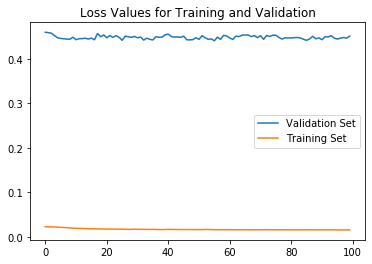

In [ ]:
# write your code in this cell to plot your results
plt.title("Loss Values for Training and Validation")
plt.plot(valid_loss, label = "Validation Set")
plt.plot(train_loss_list, label = "Training Set")
plt.legend()
plt.show()

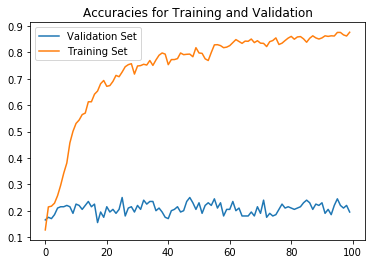

In [ ]:
plt.title("Accuracies for Training and Validation")
plt.plot(valid_acc, label = "Validation Set")
plt.plot(train_accu_list, label = "Training Set")
plt.legend()
plt.show()

#### Testing [2 pts]

Test your final model on your test set. Calculate confusion matrix, F1 score, precision and recall values and report these findings.

In [ ]:
# write your code in this cell to test your best model with the test dataset
# Create test dataset loader
test_dataLoader = DataLoader(test_dataset, test_batch)

#load model
bestModel = torch.load('/content/drive/My Drive/cs464_hw3/best_path_mlp/epoch[92]_acc[0.285].pth')

def test(model, loader): # you are free to change parameters

    model.eval()
    conf_matrix = torch.zeros((10,10))

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code

            #loading data and labels to device for using GPU
            data = data.to(device)
            labels = labels.to(device)

            #flatten images
            data = data.view(data.shape[0], -1)

            #forwarding data
            outputLabels = model.forward(data)

            #computation of accuracies
            curPredictions = torch.max(outputLabels, 1)[1]
            #curAccuracy[labels] += torch.sum(curPredictions == labels)
            conf_matrix[curPredictions, labels] += 1
    
    truePos = torch.zeros(10)
    #adding one for avoiding division by zero
    predictedSamplesCount = torch.ones(10)
    actualSampleCount = torch.ones(10)
    for i in range(10):
      truePos[i] = conf_matrix[i, i]
      predictedSamplesCount[i] += conf_matrix[i, :].sum()
    
    actualSampleCount += conf_matrix.sum(dim = 0)

    fig = plt.figure(figsize = (5, 5))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax = fig.add_subplot(111)
    fig.colorbar(ax.matshow(conf_matrix))
    plt.show()

    precision = torch.zeros(10)
    recall = torch.zeros(10)
    f1_score = torch.zeros(10)
    print("Precision for each label: ")
    for i in range(10): 
      precision[i] = truePos[i].item() / predictedSamplesCount[i].item()
      print(str(loader.dataset.dataset.classes[i]) + ": " + format(precision[i].item(), '.3f')) 
    print()         
    print("Recall for each label: ")
    for i in range(10): 
      recall[i] = truePos[i].item() / actualSampleCount[i].item()
      print(str(loader.dataset.dataset.classes[i]) + ": " + str(format(recall[i].item(), '.3f'))) 
    print()
    print("F1 Score for each label:")
    for i in range(10):
      f1_score[i] = 2 * precision[i].item() * recall[i].item() / (precision[i].item() + recall[i].item())
      print(str(loader.dataset.dataset.classes[i]) + ": " + str(format(f1_score[i].item(), '.3f')))

Test Loader Dataset: 400 data



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


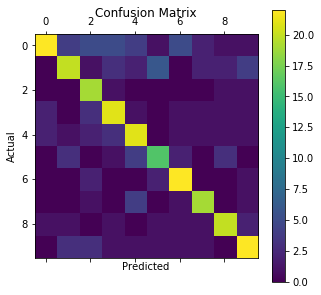

Precision for each label: 
butterfly: 0.431
cat: 0.488
chicken: 0.826
cow: 0.656
dog: 0.618
elephant: 0.533
horse: 0.786
sheep: 0.704
spider: 0.690
squirrel: 0.647

Recall for each label: 
butterfly: 0.786
cat: 0.606
chicken: 0.514
cow: 0.568
dog: 0.553
elephant: 0.571
horse: 0.629
sheep: 0.679
spider: 0.667
squirrel: 0.629

F1 Score for each label:
butterfly: 0.557
cat: 0.541
chicken: 0.633
cow: 0.609
dog: 0.583
elephant: 0.552
horse: 0.698
sheep: 0.691
spider: 0.678
squirrel: 0.638


In [ ]:
print("Test Loader Dataset: " + str(len(test_dataLoader.dataset)) + " data")
print()
test(bestModel, test_dataLoader)

### 2.2. Convolutional Neural Network (CNN) [40 pts]

#### Data Loader [2 pts]

In this part, you will train a CNN for the same problem. Again, the pixel values need to be normalized to [0,1] range. Please do **not** change images to grayscale this time. First, implement the data loader (AnimalsDataset). You have to divide the files into three sets which are <b>train (70%)</b>, <b>validation (20%)</b> and **test (10%)**.  These non-overlapping splits, which are subsets of AnimalDataset, should be retrieved using the "get_dataset" function. Note that this time you do **not** need to flatten the image. 

In [ ]:
class AnimalsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, xTensor, yTensor):
        self.x = xTensor
        self.y = yTensor     

        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
        
def get_dataset(root):
    # TODO: 
    # Normalize datasets
    data_transformer = transforms.Compose([
                                          #transforms.Resize((100, 100)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
    ])

    # Read dataset files
    dataset = datasets.ImageFolder( root + "dataset/", data_transformer)
    dataset_len = len(dataset.samples)
    print("size of dataset " + str(dataset_len))

    # Construct training, validation and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [int(dataset_len * 0.7), int(dataset_len * 0.2), int(dataset_len * 0.1)])

    return train_dataset, val_dataset, test_dataset

#### Convolutional Neural Network [10 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 32 filters with size of 3 x 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 64 filters with size of 3 x 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 128 filters with size of 3 x 3 x 3 with stride 1 and zero padding, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As a classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [ ]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
        super().__init__()
        self.convLayers = nn.Sequential(
                        nn.Conv2d(3, 32, kernel_size = 3, stride = 1),
                        nn.ReLU(),
                        nn.Conv2d(32, 64, kernel_size = 3, stride = 1),
                        nn.ReLU(),
                        nn.MaxPool2d(2, 2),
                        nn.Conv2d(64, 128, kernel_size = 3, stride = 1),
                        nn.ReLU(),
                        nn.MaxPool2d(2, 2)
        )

        self.linearLayer = nn.Linear(67712, 10)

        use_gpu = torch.cuda.is_available()
        if( use_gpu ):
          device = torch.device("cuda:0")
        else:
          device = torch.device("cpu")
        self.convLayers.to(device)
        self.linearLayer.to(device)
     
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
        X = self.convLayers(X)
        #flatten images
        X = X.view(X.size(0), -1)
        X = self.linearLayer(X)

        return X

#### Training and Testing [20 pts]

Now, train your network. You need to select the appropriate loss function and  your hyper-parameters. Make sure to shuffle the samples in the training split. Plot the training loss and accuracy for each iteration. Also plot the validation loss and accuracy for each epoch as another figure. Your model is going to run upto the "max_epoch" parameter. Pick the best model as your final model. You need to save this model as a ".pth" file. Report the test performance change (In terms of accuracy, F1 score, precision and recall) between MLP and CNN and explain the reason for this change explicitly, if there is any.

In [ ]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 100
train_batch = 100
valid_batch = 10
test_batch = 5
learning_rate = 0.01

use_gpu = torch.cuda.is_available()

if( use_gpu ):
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

print("Device: " + str(device))

train_dataset, val_dataset, test_dataset = get_dataset( "/content/drive/My Drive/cs464_hw3/")

valid_acc = []
valid_loss = []
train_loss_list = []
train_accu_list = []

def main(): # you are free to change parameters

    # Create train dataset loader
    train_dataLoader = DataLoader(train_dataset, batch_size = train_batch, shuffle = True)
    # Create validation dataset loader
    valid_dataLoader = DataLoader(val_dataset, valid_batch)
    # Create test dataset loader
    test_dataLoader = DataLoader(test_dataset, test_batch)
    # initialize your GENet neural network
    model = ConvNet()
    # define your loss function
    criterion = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0.0
    for epoch in range(max_epoch):
        print("****************************************************")
        loss_train, acc_train = train(epoch, model, criterion, optimizer, train_dataLoader)
        train_loss_list.append(loss_train)
        train_accu_list.append(acc_train)
        loss, acc = test(model, criterion, valid_dataLoader)
        valid_acc.append(acc)
        valid_loss.append(loss)
        if acc > best_acc:
           best_acc = acc
           best_path = '/content/drive/My Drive/cs464_hw3/ConvNet_best/Epoch' + str(epoch) + '{Acc' + str(acc) + '}.pth'
           torch.save(model, best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()

    accTrain = 0.0
    lossTrain = 0.0

    batch_size = 100

    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration  
        """
        training part
        """
        #loading data and labels to device for using GPU
        data = data.to(device)
        labels = labels.to(device)

        #forwarding data
        outputLabels = model.forward(data)

        #calculation of loss
        currentLoss = criterion(outputLabels, labels)

        #calculation of new weights
        optimizer.zero_grad()
        currentLoss.backward()
        optimizer.step()

        #calculating accuracies
        curPredictions = torch.max(outputLabels, 1)[1]
        curAccuracy = torch.sum(curPredictions == labels)

        #updating accuracy
        accTrain += curAccuracy.item() 
        lossTrain += currentLoss.item()
      
        loss_train = lossTrain / (batch_size * (batch_idx + 1) )
        acc_train = accTrain / (batch_size * (batch_idx + 1))
        print()
        print("Epoch [" + str(epoch + 1) + "][" + str(batch_idx + 1) + "/" + str(len(loader)) + "]")
        print("Loss: " + str(loss_train))
        print("Accu: " + str(acc_train ))
        print()

    return loss_train, acc_train



''' Test&Validate your network '''
def test(model, criterion, loader): # you are free to change parameters

    model.eval()

    accValid = 0.0
    lossValid = 0.0

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code

            #loading data and labels to device for using GPU
            data = data.to(device)
            labels = labels.to(device)

            #forwarding data
            outputLabels = model.forward(data)

            #calculation of loss
            currentLoss = criterion(outputLabels, labels)

            #computation of accuracies
            curPredictions = torch.max(outputLabels, 1)[1]
            curAccuracy = torch.sum(curPredictions == labels)

            #updating accuracy
            accValid += curAccuracy.item()
            lossValid += currentLoss.item()
        
    loss_Valid = lossValid / len(loader.dataset) 
    acc_Valid = accValid / len(loader.dataset) 

    print()
    print("Validation Results:")    
    print("Loss: " + str(loss_Valid))
    print("Accu: " + str(acc_Valid))
    print()

    return loss_Valid, acc_Valid      


Device: cuda:0
size of dataset 2000


In [ ]:
main()

****************************************************

Epoch [1][1/14]
Loss: 0.023032593727111816
Accu: 0.09


Epoch [1][2/14]
Loss: 0.02302686095237732
Accu: 0.09


Epoch [1][3/14]
Loss: 0.022990814050038656
Accu: 0.10666666666666667


Epoch [1][4/14]
Loss: 0.022985169887542723
Accu: 0.105


Epoch [1][5/14]
Loss: 0.022974044799804687
Accu: 0.096


Epoch [1][6/14]
Loss: 0.02294543703397115
Accu: 0.1


Epoch [1][7/14]
Loss: 0.023009724276406424
Accu: 0.09714285714285714


Epoch [1][8/14]
Loss: 0.023055551052093507
Accu: 0.1


Epoch [1][9/14]
Loss: 0.023099263509114582
Accu: 0.1


Epoch [1][10/14]
Loss: 0.0230850293636322
Accu: 0.097


Epoch [1][11/14]
Loss: 0.023073617761785334
Accu: 0.10181818181818182


Epoch [1][12/14]
Loss: 0.023035000562667846
Accu: 0.1075


Epoch [1][13/14]
Loss: 0.023027682854579044
Accu: 0.11307692307692307


Epoch [1][14/14]
Loss: 0.023014587674822125
Accu: 0.11071428571428571


Validation Results:
Loss: 0.22728765547275542
Accu: 0.17

**************************

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist


Epoch [2][1/14]
Loss: 0.022549242973327638
Accu: 0.26


Epoch [2][2/14]
Loss: 0.02250484228134155
Accu: 0.2


Epoch [2][3/14]
Loss: 0.022597848574320477
Accu: 0.19333333333333333


Epoch [2][4/14]
Loss: 0.022485334277153015
Accu: 0.205


Epoch [2][5/14]
Loss: 0.022456160068511963
Accu: 0.208


Epoch [2][6/14]
Loss: 0.02247636318206787
Accu: 0.19666666666666666


Epoch [2][7/14]
Loss: 0.022458100659506663
Accu: 0.2


Epoch [2][8/14]
Loss: 0.022404150664806367
Accu: 0.20625


Epoch [2][9/14]
Loss: 0.022356317043304444
Accu: 0.20444444444444446


Epoch [2][10/14]
Loss: 0.022362226247787477
Accu: 0.2


Epoch [2][11/14]
Loss: 0.02229348291050304
Accu: 0.19818181818181818


Epoch [2][12/14]
Loss: 0.022297698458035788
Accu: 0.19833333333333333


Epoch [2][13/14]
Loss: 0.022324745471660908
Accu: 0.19692307692307692


Epoch [2][14/14]
Loss: 0.022325046403067452
Accu: 0.1992857142857143


Validation Results:
Loss: 0.22345295488834382
Accu: 0.2075

***********************************************

# Plotting results for Train & Validation for CNN

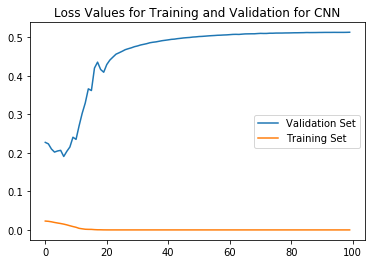

In [ ]:
plt.title("Loss Values for Training and Validation for CNN")
plt.plot(valid_loss, label = "Validation Set")
plt.plot(train_loss_list, label = "Training Set")
plt.legend()
plt.show()

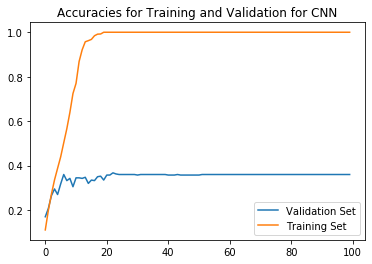

In [ ]:
plt.title("Accuracies for Training and Validation for CNN")
plt.plot(valid_acc, label = "Validation Set")
plt.plot(train_accu_list, label = "Training Set")
plt.legend()
plt.show()

# Testing
Here is the test part.
Results in terms of accuracy, F1 score, precision and recall

In [ ]:
# Create test dataset loader
test_dataLoader = DataLoader(test_dataset, test_batch)

#load model
bestModel = torch.load('/content/drive/My Drive/cs464_hw3/ConvNet_best/Epoch22{Acc0.3675}.pth')

# define your loss function
criterion = nn.CrossEntropyLoss()

def test(model, criterion, loader): # you are free to change parameters

    model.eval()
    conf_matrix = torch.zeros((10,10))

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code

            #loading data and labels to device for using GPU
            data = data.to(device)
            labels = labels.to(device)

            #forwarding data
            outputLabels = model.forward(data)

            #computation of accuracies
            curPredictions = torch.max(outputLabels, 1)[1]
            #curAccuracy[labels] += torch.sum(curPredictions == labels)
            conf_matrix[curPredictions, labels] += 1
    
    truePos = torch.ones(10)
    #adding one for avoiding division by zero
    predictedSamplesCount = torch.ones(10)
    actualSampleCount = torch.ones(10)
    for i in range(10):
      truePos[i] += conf_matrix[i, i]
      predictedSamplesCount[i] += conf_matrix[i, :].sum()
    
    actualSampleCount += conf_matrix.sum(dim = 0)

    fig = plt.figure(figsize = (5, 5))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax = fig.add_subplot(111)
    fig.colorbar(ax.matshow(conf_matrix))
    plt.show()


    precision = torch.zeros(10)
    recall = torch.zeros(10)
    f1_score = torch.zeros(10)
    print("Precision for each label: ")
    for i in range(10): 
      precision[i] = truePos[i].item() / predictedSamplesCount[i].item()
      print(str(loader.dataset.dataset.classes[i]) + ": " + format(precision[i].item(), '.3f')) 
    print()         
    print("Recall for each label: ")
    for i in range(10): 
      recall[i] = truePos[i].item() / actualSampleCount[i].item()
      print(str(loader.dataset.dataset.classes[i]) + ": " + str(format(recall[i].item(), '.3f'))) 
    print()
    print("F1 Score for each label:")
    for i in range(10):
      f1_score[i] = 2 * precision[i].item() * recall[i].item() / (precision[i].item() + recall[i].item())
      print(str(loader.dataset.dataset.classes[i]) + ": " + str(format(f1_score[i].item(), '.3f')))

Test Loader Dataset: 200 data



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


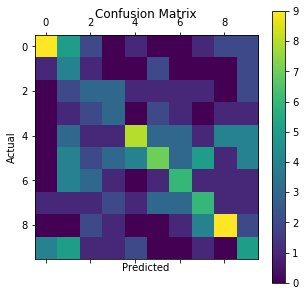

Precision for each label: 
butterfly: 0.435
cat: 0.455
chicken: 0.267
cow: 0.333
dog: 0.310
elephant: 0.235
horse: 0.368
sheep: 0.333
spider: 0.500
squirrel: 0.300

Recall for each label: 
butterfly: 0.625
cat: 0.167
chicken: 0.211
cow: 0.250
dog: 0.500
elephant: 0.400
horse: 0.368
sheep: 0.333
spider: 0.500
squirrel: 0.240

F1 Score for each label:
butterfly: 0.513
cat: 0.244
chicken: 0.235
cow: 0.286
dog: 0.383
elephant: 0.296
horse: 0.368
sheep: 0.333
spider: 0.500
squirrel: 0.267


In [ ]:
print("Test Loader Dataset: " + str(len(test_dataLoader.dataset)) + " data")
print()
test(bestModel, criterion, test_dataLoader)

#### Weight Visualization [8 pts]

For the best convolutional model you obtained, extract the final weights from the first convolutional layer. Visualize each filter of the first convolutional layer as an image. Show these images in a grid.

Filters are displayed


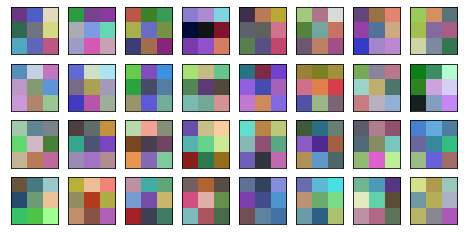

In [ ]:
# write your code in this cell to visualize filters of the first convolutional layer 
bestModel = torch.load('/content/drive/My Drive/cs464_hw3/ConvNet_best/Epoch22{Acc0.3675}.pth')
weights = bestModel.convLayers[0].weight.data
#normalizing weights
w_min = weights.min()
w_max = weights.max()
weights = (weights -  w_min) / (w_max - w_min)
#weights.detach().cpu().clone().numpy()
#visualizing 32 filters
count = 1
print("Filters are displayed")
#print("Each row has 3 images corresponding to each channel of one filter")
fig = plt.figure(figsize = (8, 4))
for i in range(32):
  f = weights[i, :, :, :].detach().cpu().clone().numpy()
  ax = fig.add_subplot(4, 8, count)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.imshow(f)
  count += 1
plt.show()

Filters are displayed
Each row has 3 images corresponding to each channel of one filter


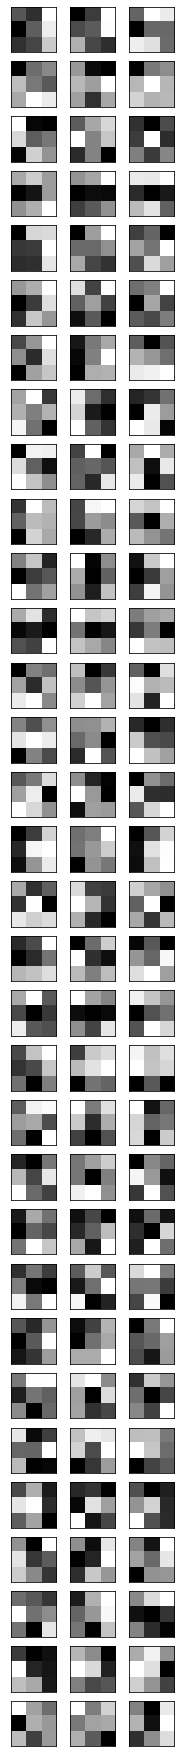

In [ ]:
count = 1
print("Filters are displayed")
print("Each row has 3 images corresponding to each channel of one filter")
fig = plt.figure(figsize = (3, 32))
for i in range(32):
  f = weights[i, :, :, :].detach().cpu().clone().numpy()
  for j in range(3):
    ax = fig.add_subplot(32, 3, count)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap = 'gray')
    count += 1
plt.show()

###Discussion of Results
As it is seen from the results, MLP was slightly better than CNN for this set of data. The reason of that was because this dataset consist of 200 images for each category, which is small enough already. MLP was better at predicting future datasets, though, CNN was better at learning the data. However, it overfitted training set, which hinders it from predicting unseen data. 

### 2.3 Transfer Learning [20 pts]

The trained weights of a network can be used as a starting point for the weights of a different neural network to solve another similar problem. This approach is called <b>"Transfer Learning"</b>. <br>

For this model, your data loader is the same as Question 2.2.

#### Model

You will to use Inception_V3 convolutional neural network which is one of the well-known CNN models. You <b>DO NOT</b> need to implement your own  architecture. Torchvision has also a model set which contains commonly used CNN models including Inception_V3 (Szegedy et al., 2016). You will use pretrained network weights as a starting point. These weights will come from the result of the training with Imagenet dataset. These will be loaded automatically when you set the "pretrained" parameter as "True" (check the hints in the code). Otherwise, weights will be randomly initialized.

#### Train & Validation  [15 pts]

In this case, use ImageNet pretrained Inception_V3 model on the Animal dataset. At the end of each epoch, you should evaluate your network with validation split. Modify your classifier layer by adding fully connected layers with proper activation function. Print training loss, training accuracy, validation loss and validation accuracy values for each epoch as an output of the cell below. Report the best validation accuracy score. Then, report test accuacy for your best model.

In [ ]:
import torchvision

model = torchvision.models.inception_v3(pretrained = True, aux_logits = False)
lastLayerFeatures = model.fc.in_features
model.fc = nn.Linear(lastLayerFeatures, 10)

# write your code in this cell to train your network using transfer learning approach
use_gpu = torch.cuda.is_available()

if( use_gpu ):
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

model.to(device)

train_batch = 100
valid_batch = 10
test_batch = 5
max_epoch = 50
learning_rate = 0.01

train_dataset, val_dataset, test_dataset = get_dataset( "/content/drive/My Drive/cs464_hw3/")

valid_acc = []
valid_loss = []
train_loss_list = []
train_accu_list = []

def main_tl(): # you are free to change parameters

    # Create train dataset loader
    train_dataLoader = DataLoader(train_dataset, batch_size = train_batch, shuffle = True)
    # Create validation dataset loader
    valid_dataLoader = DataLoader(val_dataset, valid_batch)
    # Create test dataset loader
    test_dataLoader = DataLoader(test_dataset, test_batch)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    # define your loss function
    criterion = nn.CrossEntropyLoss()


    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0.0
    for epoch in range(max_epoch):
        print("****************************************************")
        loss_train, acc_train = train(epoch, model, criterion, optimizer, train_dataLoader)
        train_loss_list.append(loss_train)
        train_accu_list.append(acc_train)
        loss, acc = test(model, criterion, valid_dataLoader)
        valid_acc.append(acc)
        valid_loss.append(loss)
        if acc > best_acc:
           best_acc = acc
           best_path = '/content/drive/My Drive/cs464_hw3/InceptionV3_best/Epoch' + str(epoch) + '{Acc' + str(acc) + '}.pth'
           torch.save(model, best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()

    accTrain = 0.0
    lossTrain = 0.0

    batch_size = 100

    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration  
        """
        training part
        """
        #loading data and labels to device for using GPU
        data = data.to(device)
        labels = labels.to(device)

        #forwarding data
        outputLabels = model.forward(data)

        #calculation of loss
        currentLoss = criterion(outputLabels, labels)

        #calculation of new weights
        optimizer.zero_grad()
        currentLoss.backward()
        optimizer.step()

        #calculating accuracies
        curPredictions = torch.max(outputLabels, 1)[1]
        curAccuracy = torch.sum(curPredictions == labels)

        #updating accuracy
        accTrain += curAccuracy.item() 
        lossTrain += currentLoss.item()
      
        loss_train = lossTrain / (batch_size * (batch_idx + 1) )
        acc_train = accTrain / (batch_size * (batch_idx + 1))
        print()
        print("Epoch [" + str(epoch + 1) + "][" + str(batch_idx + 1) + "/" + str(len(loader)) + "]")
        print("Loss: " + str(loss_train))
        print("Accu: " + str(acc_train ))
        print()

    return loss_train, acc_train



''' Test&Validate your network '''
def test(model, criterion, loader): # you are free to change parameters

    model.eval()

    accValid = 0.0
    lossValid = 0.0

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code

            #loading data and labels to device for using GPU
            data = data.to(device)
            labels = labels.to(device)

            #forwarding data
            outputLabels = model.forward(data)

            #calculation of loss
            currentLoss = criterion(outputLabels, labels)

            #computation of accuracies
            curPredictions = torch.max(outputLabels, 1)[1]
            curAccuracy = torch.sum(curPredictions == labels)

            #updating accuracy
            accValid += curAccuracy.item()
            lossValid += currentLoss.item()
        
    loss_Valid = lossValid / len(loader.dataset) 
    acc_Valid = accValid / len(loader.dataset) 

    print()
    print("Validation Results:")    
    print("Loss: " + str(loss_Valid))
    print("Accu: " + str(acc_Valid))
    print()

    return loss_Valid, acc_Valid      


size of dataset 2000


In [ ]:
main_tl()

****************************************************

Epoch [1][1/14]
Loss: 0.023003041744232178
Accu: 0.12


Epoch [1][2/14]
Loss: 0.02306351065635681
Accu: 0.11


Epoch [1][3/14]
Loss: 0.02300403674443563
Accu: 0.11333333333333333


Epoch [1][4/14]
Loss: 0.023132551908493042
Accu: 0.1025


Epoch [1][5/14]
Loss: 0.023171451568603514
Accu: 0.108


Epoch [1][6/14]
Loss: 0.02330278038978577
Accu: 0.105


Epoch [1][7/14]
Loss: 0.02323988505772182
Accu: 0.10714285714285714


Epoch [1][8/14]
Loss: 0.0232774817943573
Accu: 0.105


Epoch [1][9/14]
Loss: 0.023300854100121393
Accu: 0.10333333333333333


Epoch [1][10/14]
Loss: 0.02329907965660095
Accu: 0.103


Epoch [1][11/14]
Loss: 0.02329279747876254
Accu: 0.10272727272727272


Epoch [1][12/14]
Loss: 0.023313283522923788
Accu: 0.10333333333333333


Epoch [1][13/14]
Loss: 0.02330042527272151
Accu: 0.10384615384615385


Epoch [1][14/14]
Loss: 0.02328214338847569
Accu: 0.10428571428571429


Validation Results:
Loss: 0.24315165758132934
Accu: 0.13

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Inception3. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

****************************************************

Epoch [2][1/14]
Loss: 0.02318262815475464
Accu: 0.09


Epoch [2][2/14]
Loss: 0.02309789776802063
Accu: 0.12


Epoch [2][3/14]
Loss: 0.02295944611231486
Accu: 0.11666666666666667


Epoch [2][4/14]
Loss: 0.023182826042175295
Accu: 0.13


Epoch [2][5/14]
Loss: 0.02316410255432129
Accu: 0.156


Epoch [2][6/14]
Loss: 0.023133445978164673
Accu: 0.15833333333333333


Epoch [2][7/14]
Loss: 0.023197684288024902
Accu: 0.1657142857142857


Epoch [2][8/14]
Loss: 0.02326690047979355
Accu: 0.1625


Epoch [2][9/14]
Loss: 0.023415923913319904
Accu: 0.17


Epoch [2][10/14]
Loss: 0.023328401803970337
Accu: 0.178


Epoch [2][11/14]
Loss: 0.023369497602636163
Accu: 0.18272727272727274


Epoch [2][12/14]
Loss: 0.023257684310277305
Accu: 0.19333333333333333


Epoch [2][13/14]
Loss: 0.023228328411395733
Accu: 0.19538461538461538


Epoch [2][14/14]
Loss: 0.023128190892083303
Accu: 0.19857142857142857


Validation Results:
Loss: 0.2262469846010208
Accu: 0.2

#### Kernel Output Visualization [5 pts]

You have trained Inception_V3 which is pretrained with ImageNet dataset. For this network, extract the final weights from the first convolutional layer. Visualize each filter of the first convolutional layer as an image. Merge each image obtained from the corresponding kernel in a squared grid format. Explain what these outputs mean explicitly. Compare your plot with the obtained from 3.3.2.

torch.Size([32, 3, 3, 3])
Filters are displayed


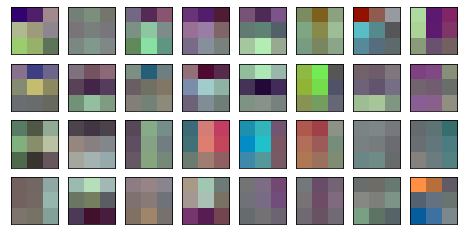

In [ ]:
# write your code in this cell to visualize output of the each filter at the first conv layer
bestModel = torch.load('/content/drive/My Drive/cs464_hw3/InceptionV3_best/Epoch47{Acc0.7025}.pth')
weights = bestModel.Conv2d_1a_3x3.conv.weight.data
#normalizing weights
w_min = weights.min()
w_max = weights.max()
weights = (weights -  w_min) / (w_max - w_min)
print(weights.shape)
#weights.detach().cpu().clone().numpy()
#visualizing 32 filters
count = 1
print("Filters are displayed")
fig = plt.figure(figsize = (8, 4))
for i in range(32):
  f = weights[i, :, :, :].detach().cpu().clone().numpy()
  ax = fig.add_subplot(4, 8, count)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.imshow(f)
  count += 1
plt.show()


Filters are displayed
Each row has 3 images corresponding to each channel of one filter


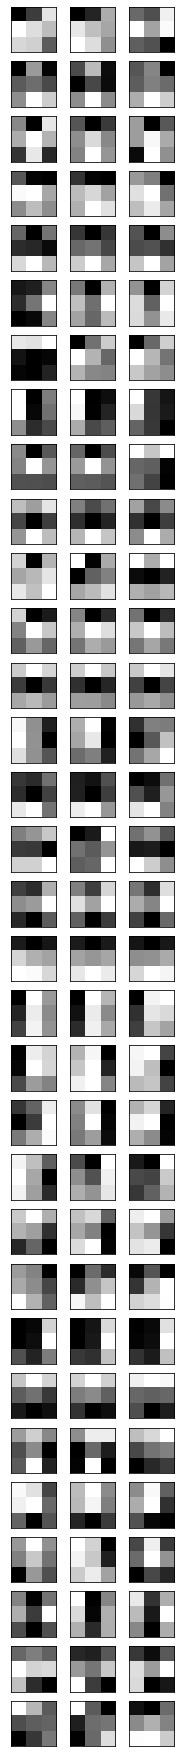

In [ ]:
count = 1
print("Filters are displayed")
print("Each row has 3 images corresponding to each channel of one filter")
fig = plt.figure(figsize = (3, 32))
for i in range(32):
  f = weights[i, :, :, :].detach().cpu().clone().numpy()
  for j in range(3):
    ax = fig.add_subplot(32, 3, count)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap = "gray")
    count += 1
plt.show()

### 2.4 Interpretation [10 pts.]

Explicitly discuss the results that you have obtained in Question 2. Among MLP, CNN (trained from scratch) and transfer learning, which one do you think is better? What are the weaknesses and strengths of each method?

Among MLP, CNN (from scratch) and transfer learning, Transfer Learning was the best one. Because of the dataset, it was hard to learn unique patterns that belong to a certain category, but Transfer Learning model did its best to predict unseen data. Comparing to CNN (from scratch), transfer learning did not overfit the data. CNN was also good at learning the dataset, but it overfitted the dataset because of lack of enough data. In training, after a certain point CNN performed 100% accuracy with low loss values, which shows that it perfectly learned the dataset. However, in predicting unseen dataset, it did not perform so well. Although CNN has performed better than MLP with 36% accuracy, it is still not good enough. Comparing MLP to CNN, CNN was better both in training and validation. However, in predicting test samples MLP was better. Still, this set of data is not good enough to distinguish the traits of these three methods because there was not enough data available. 
Also, I think, 3x3 filters are also not quite informative about the models.

##References

Alessio, Corrado. “Animals-10.” Kaggle, 4 Oct. 2018, https://www.kaggle.com/alessiocorrado99/animals10.<br>

Szegedy, Christian, et al. "Rethinking the inception architecture for computer vision." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.<br>
